In [4]:
from source.core.engine import MoP
import source.core.run_partition as run_p
from os import environ
from source.utils.dataset import *
from source.utils.misc import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

dataset='cifar100'
environ["config"] = f"config/{dataset}.yaml"

In [6]:
configs = run_p.main()

configs["device"] = "cuda:0"
configs['load_model'] = "cifar100-wrn28-kernel-npv1-pr0.pt"
configs["num_partition"] = '4'#"config/resnet18-v2.yaml"

print(configs)
mop = MoP(configs)

device :  
model :  wrn28_10
data_code :  cifar100
num_classes :  100
model_file :  test.pt
epochs :  0
batch_size :  128
optimizer :  sgd
lr_scheduler :  default
learning_rate :  0.1
seed :  1234
sparsity_type :  kernel
prune_ratio :  1
admm :  True
admm_epochs :  300
rho :  0.0001
multi_rho :  True
retrain_bs :  128
retrain_lr :  0.005
retrain_ep :  50
retrain_opt :  default
xentropy_weight :  1.0
warmup :  False
warmup_lr :  0.01
warmup_epochs :  10
mix_up :  True
alpha :  0.3
smooth :  False
smooth_eps :  0
save_last_model_only :  False
num_partition :  1
layer_type :  regular
bn_type :  masked
par_first_layer :  False
comm_outsize :  False
lambda_comm :  0
lambda_comp :  0
distill_model :  
distill_loss :  kl
distill_temp :  30
distill_alpha :  1
{'device': 'cuda:0', 'model': 'wrn28_10', 'data_code': 'cifar100', 'num_classes': 100, 'model_file': 'test.pt', 'epochs': 0, 'batch_size': 128, 'optimizer': 'sgd', 'lr_scheduler': 'default', 'learning_rate': 0.1, 'seed': 1234, 'sparsity_t

Files already downloaded and verified
Files already downloaded and verified


RuntimeError: The size of tensor a (160) must match the size of tensor b (128) at non-singleton dimension 0

In [ ]:
mop.model
mop.model.named_parameters()

<generator object Module.named_parameters at 0x000002D02A818120>

In [ ]:
mop.train_loader, mop.test_loader = get_dataset_from_code(mop.configs['data_code'], mop.configs['batch_size'])


nepoch = mop.configs['epochs']
criterion, optimizer, scheduler = set_optimizer(mop.configs, mop.model, mop.train_loader, \
                                             mop.configs['optimizer'], mop.configs['learning_rate'], nepoch)

print('Testing model \"'+ configs['load_model'] + '\" on ' + configs['data_code'] )

acc = mop.test_model(mop.model, criterion)
#print(mop.configs['data_code'])
#mop.evalHelper.accuracy(mop.model, mop.test_loader)


Files already downloaded and verified
Files already downloaded and verified
Testing model "cifar100-wrn28-kernel-npv1-pr0.pt" on cifar100
Epoch-[000]: Test loss: 3.41, acc: 24.81.


In [ ]:
train_features, train_labels = next(iter(mop.train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]



Feature batch shape: torch.Size([128, 3, 32, 32])
Labels batch shape: torch.Size([128])


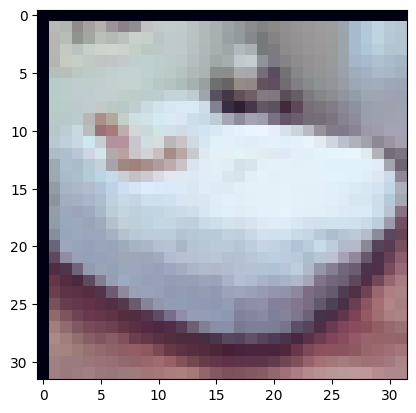

Label: bed


In [ ]:
max_val = max(img.reshape((img.numel(),))).item()
min_val = min(img.reshape((img.numel(),))).item()
img_scaled = (img - min_val)/(max_val - min_val)


plt.imshow(img_scaled.permute(1,2,0)) # plt expects channels to be 3-rd
plt.show()

class_mapping = list(mop.train_loader.dataset.class_to_idx)
print(f"Label: {class_mapping[label.item()]}")

In [ ]:
img.size()
train_labels
mop.train_loader.dataset.class_to_idx



{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [ ]:
print(f"Label: {class_mapping[label.item()]}")

Label: bed


In [ ]:
class_mapping[7]

'beetle'

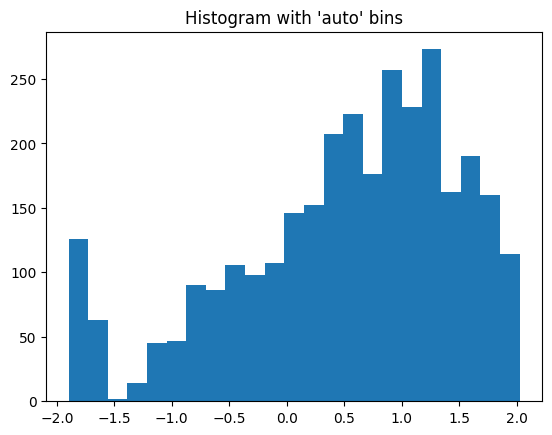

tensor(2.0254)
tensor(-1.8975)


In [ ]:
''' 
it looks like the element values are not as imshow expected i.e. either [0, 1] or [0, 255]
look at the histogram of the image
'''

_ = plt.hist(img.reshape((img.numel(),)), bins='auto')  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")
#Text(0.5, 1.0, "Histogram with 'auto' bins")

plt.show()

print(max(img.reshape((img.numel(),))))
print(min(img.reshape((img.numel(),))))

In [ ]:
''' 
    prep time taking a long time?
    or is it the cleaning of the queue?
'''

import torch 
import time 

for flag in [0,1]:
    queue_data = []
    for i in range(5):
        adict = {
            'layer': 1,
            'tensor':torch.rand((64, 128, 128))
            }
        queue_data.append(adict)

    queue_data[0]['layer'] = -1

    start = time.perf_counter() 
    if not flag:
        queue_data = [el for el in queue_data if el['layer'] != -1]
        method_str = 'list comp'
    else:
        method_str = 'filter'
        queue_data = list(filter(lambda el: el['layer'] != -1, queue_data))
    dur = time.perf_counter() -start

    print(f'method {method_str} : {dur}')
